In [1]:
import  os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from utils.dataProcess import ts2batch_ctx_tar


In [2]:
os.getcwd()

'/Users/I562243/Documents/to_send_GD/code/kit/AWS/traffic_data/hist_aws/NS_transformer_tim_ETTh2'

In [3]:


# Path to your file
file_path = os.path.join(os.getcwd(),'data/NASDAQ.csv')

# Load the CSV file into a numpy array
#data = np.genfromtxt(file_path, delimiter=',', skip_header=1, dtype=None, names=True)
data = pd.read_csv(file_path)

# Display the loaded data
print(data)

            Date        Close    Volume       mom      mom1      mom2  \
0     2009-12-31  2269.149902       NaN       NaN       NaN       NaN   
1     2010-01-04  2308.419922  0.560308  0.017306       NaN       NaN   
2     2010-01-05  2308.709961  0.225994  0.000126  0.017306       NaN   
3     2010-01-06  2301.090088 -0.048364 -0.003300  0.000126  0.017306   
4     2010-01-07  2300.050049  0.007416 -0.000452 -0.003300  0.000126   
...          ...          ...       ...       ...       ...       ...   
1979  2017-11-09  6750.049805  0.058830 -0.005755  0.003153 -0.002750   
1980  2017-11-10  6750.939941 -0.116863  0.000132 -0.005755  0.003153   
1981  2017-11-13  6757.600098 -0.000091  0.000987  0.000132 -0.005755   
1982  2017-11-14  6737.870117  0.005087 -0.002920  0.000987  0.000132   
1983  2017-11-15  6706.209961 -0.037891 -0.004699 -0.002920  0.000987   

          mom3     ROC_5    ROC_10    ROC_15  ...   NZD  silver-F  RUSSELL-F  \
0          NaN       NaN       NaN       Na

In [4]:
data['DTB6']

0       0.20
1       0.18
2       0.17
3       0.15
4       0.16
        ... 
1979    1.33
1980    1.34
1981    1.35
1982    1.37
1983    1.36
Name: DTB6, Length: 1984, dtype: float64

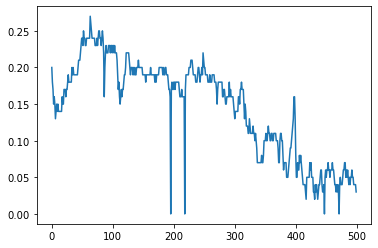

In [5]:
plt.plot(data['DTB6'][:500])
#plt.plot(data['Close'][:500])
plt.show()

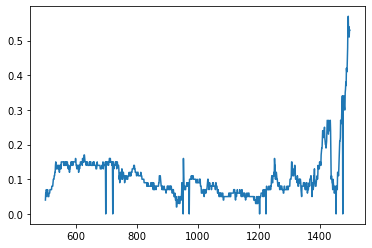

In [6]:
plt.plot(data['DTB6'][500:1500])


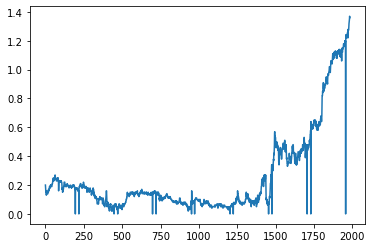

In [7]:
plt.plot(data['DTB6'])


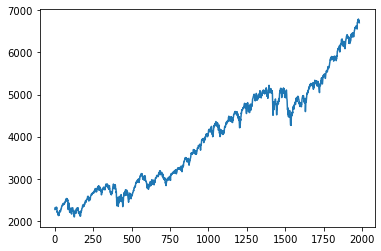

In [8]:
plt.plot(data['Close'])

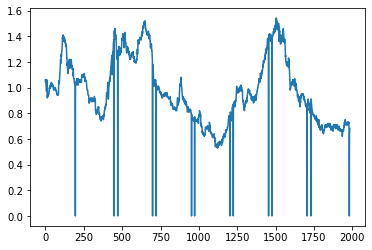

In [9]:
plt.plot(data['DE1'])
plt.show()

In [10]:
from utils.dataProcess import ts2batch_ctx_tar

In [16]:
arr = data['DE1'].to_numpy()
N_tr = int(0.7*len(arr))
N_tr

1388

In [17]:
17420/5
stride = 1
n_batch = int(len(data['DE1'])/stride )
print(n_batch)

1984


In [18]:

arr_train_flat , arr_test_flat = arr[:N_tr] , arr[N_tr:]
mean  = np.mean(arr_train_flat , axis=0)
sigma = np.std(arr_train_flat  , axis=0)
normalizer={"mean":mean,"sigma":sigma}


ctx_len = 60
tar_len = 30


arr_train_batched   ,centers_train   = ts2batch_ctx_tar(arr_train_flat,n_batch=int(3500*0.7) , len_ctx=ctx_len , len_tar = tar_len) # inside the function the repetitce centers are removed
arr_test_batched    ,centers_test    = ts2batch_ctx_tar(arr_train_flat,n_batch=int(3500*0.3) , len_ctx=ctx_len , len_tar = tar_len)



In [19]:

arr_train_batched = np.expand_dims(arr_train_batched , axis=-1)
arr_test_batched = np.expand_dims(arr_test_batched , axis=-1)
arr_train_flat = np.expand_dims(arr_train_flat , axis=-1)
arr_test_flat = np.expand_dims(arr_test_flat , axis=-1)




print(arr_train_batched.shape)
print(arr_test_batched.shape)
print(arr_train_flat.shape)
print(arr_test_flat.shape)


print(mean,sigma)
print(normalizer['mean'])

(1095, 90, 1)
(743, 90, 1)
(1388, 1)
(596, 1)
0.9777305475504324 0.24513178133319416
0.9777305475504324


In [20]:


with open('DE1_train_batched'+str(ctx_len)+'_to_'+str(tar_len) +'.pickle', 'wb') as handle11:
    pickle.dump(arr_train_batched, handle11, protocol=pickle.HIGHEST_PROTOCOL)

with open('DE1_test_batched'+str(ctx_len)+'_to_'+str(tar_len) +'.pickle', 'wb') as handle11:
    pickle.dump(arr_test_batched, handle11, protocol=pickle.HIGHEST_PROTOCOL)

# with open('DE1_train_flat.pickle', 'wb') as handle11:
#     pickle.dump(arr_train_flat, handle11, protocol=pickle.HIGHEST_PROTOCOL)
#
# with open('DE1_test_flat.pickle', 'wb') as handle11:
#     pickle.dump(arr_test_flat, handle11, protocol=pickle.HIGHEST_PROTOCOL)

with open('DE1_normalzier.pickle', 'wb') as handle11:
    pickle.dump(normalizer, handle11, protocol=pickle.HIGHEST_PROTOCOL)
